In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv("Absenteeism_at_work.csv")
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,"239,554",...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,"239,554",...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,"239,554",...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,2


In [14]:
print(df.shape)

(740, 21)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   ID                               740 non-null    int64 
 1   Reason for absence               740 non-null    int64 
 2   Month of absence                 740 non-null    int64 
 3   Day of the week                  740 non-null    int64 
 4   Seasons                          740 non-null    int64 
 5   Transportation expense           740 non-null    int64 
 6   Distance from Residence to Work  740 non-null    int64 
 7   Service time                     740 non-null    int64 
 8   Age                              740 non-null    int64 
 9   Work load Average/day            740 non-null    object
 10  Hit target                       740 non-null    int64 
 11  Disciplinary failure             740 non-null    int64 
 12  Education                        740

In [18]:
df.describe(include='all')

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"222,196",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,NaN,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,NaN,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,NaN,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,NaN,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,NaN,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,NaN,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000


In [24]:
#Reason for absenceis encoded according to ICD(International Code of Diseases)
#for the sake of simplicity when plotting we can change it to no absence, medical, non-medical
def group_reason(x):
    if x == 0:
        return 'No absence'
    elif 1 <= x <= 21:
        return "Medical"
    else:
        return "Non-Medical"

df['Reason for absence'] = df['Reason for absence'].apply(group_reason)
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,Non-Medical,7,3,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,4
1,36,No absence,7,3,1,118,13,18,50,"239,554",...,1,1,1,1,0,0,98,178,31,0
2,3,Non-Medical,7,4,1,179,51,18,38,"239,554",...,0,1,0,1,0,0,89,170,31,2
3,7,Medical,7,5,1,279,5,14,39,"239,554",...,0,1,2,1,1,0,68,168,24,4
4,11,Non-Medical,7,5,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,2


In [28]:
#checking null values
df.isna().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [34]:
#so we got lucky with the dataset, no null values 

#converting column work load average/day into numerical from categorical
df['Work load Average/day '] = df['Work load Average/day '].str.replace(',', '').astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   ID                               740 non-null    int64 
 1   Reason for absence               740 non-null    object
 2   Month of absence                 740 non-null    int64 
 3   Day of the week                  740 non-null    int64 
 4   Seasons                          740 non-null    int64 
 5   Transportation expense           740 non-null    int64 
 6   Distance from Residence to Work  740 non-null    int64 
 7   Service time                     740 non-null    int64 
 8   Age                              740 non-null    int64 
 9   Work load Average/day            740 non-null    int32 
 10  Hit target                       740 non-null    int64 
 11  Disciplinary failure             740 non-null    int64 
 12  Education                        740

In [73]:
# Seasons
df['Seasons'] = df['Seasons'].map({
    1: 'Summer',
    2: 'Autumn',
    3: 'Winter',
    4: 'Spring'
})

# Days of the week
df['Day of the week'] = df['Day of the week'].map({
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday'
})

# Education
df['Education'] = df['Education'].map({
    1: 'High School',
    2: 'Graduate',
    3: 'Postgraduate',
    4: 'PhD'
})

# Social drinker
df['Social drinker'] = df['Social drinker'].map({
    1: 'Yes',
    0: 'No'
})

# Social smoker
df['Social smoker'] = df['Social smoker'].map({
    1: 'Yes',
    0: 'No'
})

# Disciplinary failure
df['Disciplinary failure'] = df['Disciplinary failure'].map({
    1: 'Yes',
    0: 'No'
})

In [ ]:
#checking for duplicates values
print(df.duplicated().sum(), "\n\n")

print(df[df.duplicated()])

In [54]:
df = df.drop_duplicates(subset=["ID"])
print(df.duplicated().sum())

0


In [62]:
#checking for skewness
#Skewness > 0: Right-skewed (positively skewed).
#Skewness < 0: Left-skewed (negatively skewed).
#Skewness = 0: Symmetrical (normal distribution).
#-0.5 to +0.5 Approximately symmetric

skewness = df[df.select_dtypes(include=['number']).columns].skew()
print(skewness)

ID                                 0.000000
Month of absence                  -1.369593
Day of the week                   -0.018575
Seasons                            1.106743
Transportation expense             0.240068
Distance from Residence to Work    0.461922
Service time                       0.715554
Age                                0.614887
Work load Average/day              1.400342
Hit target                        -1.569774
Disciplinary failure               2.583803
Education                          2.111935
Son                                0.652927
Social drinker                     0.000000
Social smoker                      1.612059
Pet                                2.184908
Weight                             0.556402
Height                             1.758784
Body mass index                    0.908499
Absenteeism time in hours          4.003500
dtype: float64


columns: id, social drinker, Distance from Residence to Work, Hit target, Weight, Day of the week, Transportation expense,  --> symmetric

columns: Seasons, Service Time, Age, Work load Average/day, Disciplinary failure, Education, Son, Social Smoker, Pet, Height, Body mass index, Absenteeism time in hours ---> right-skewed

columns: Month of absence, Hit target ---> left-skewed

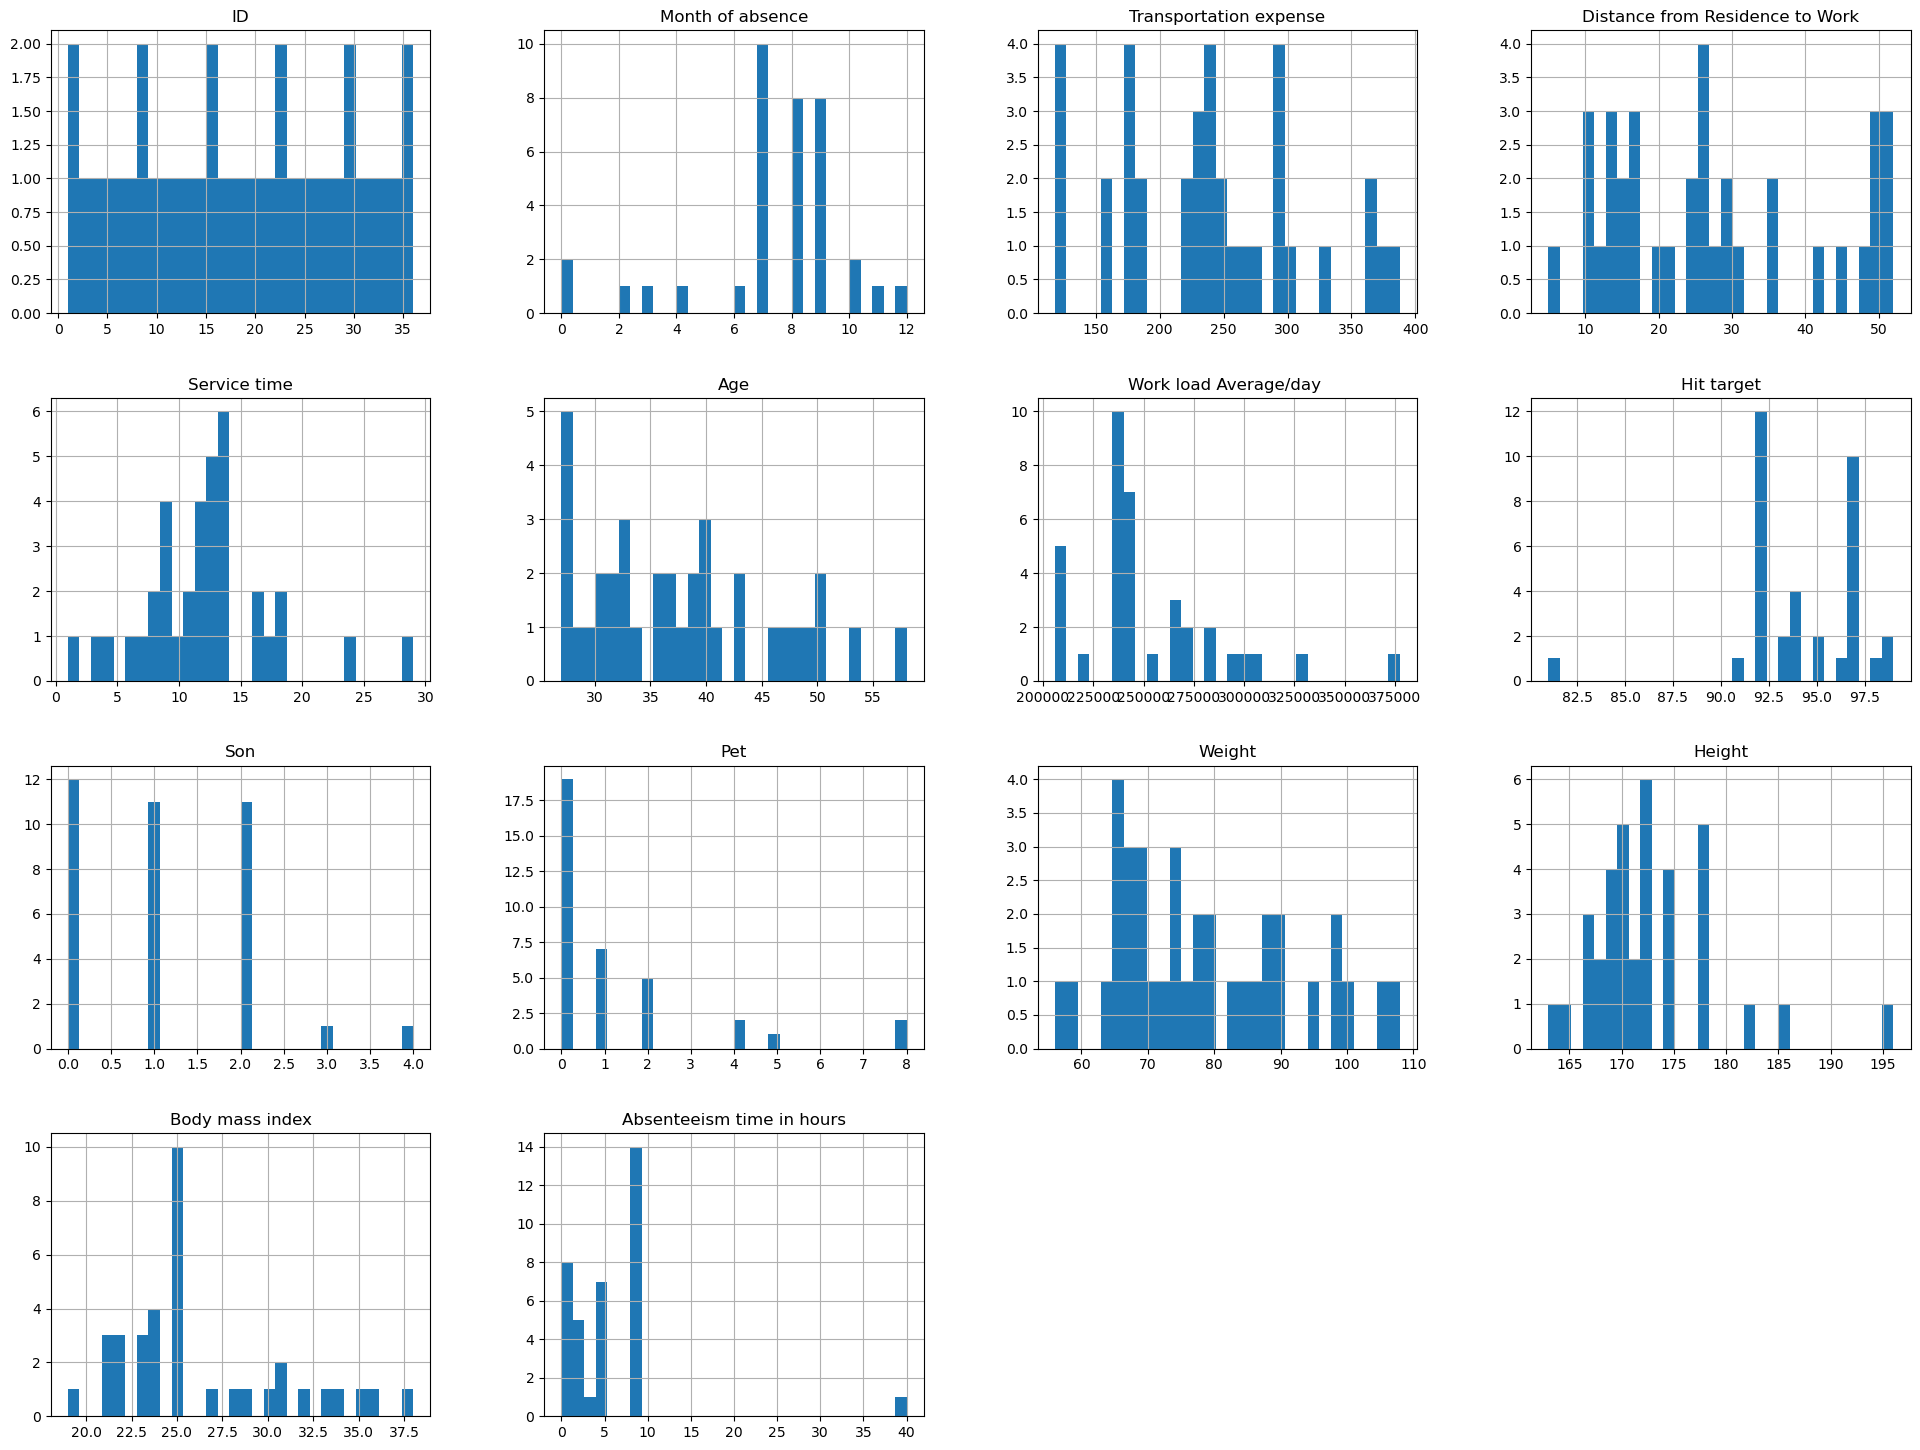

In [110]:
df.select_dtypes(include='number').hist(bins=30, figsize=(24,18))
plt.show()

In [118]:
df['Work load Average/day '] = np.log1p(df['Work load Average/day '])
check = df['Work load Average/day '].skew()
print(check)

0.8420004611161909


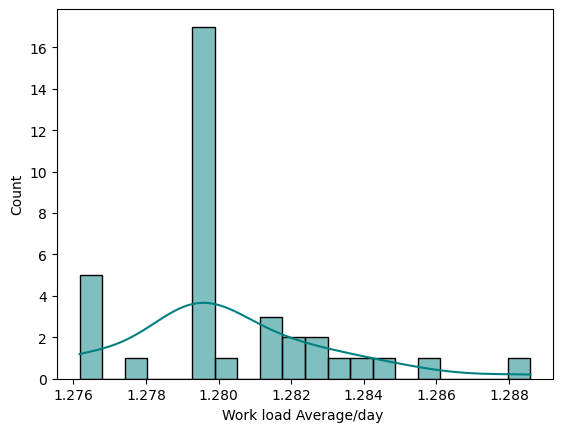

In [120]:
sns.histplot(df['Work load Average/day '], bins=20, kde=True, color='teal')
plt.show()

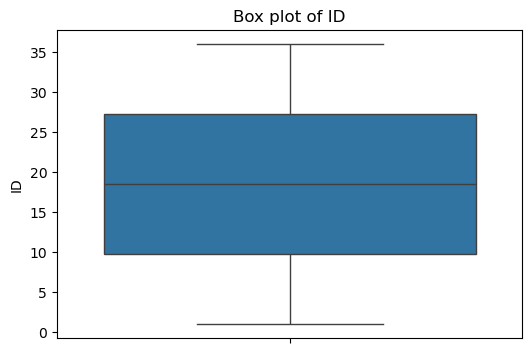

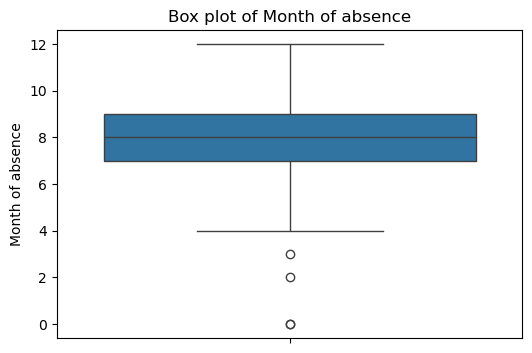

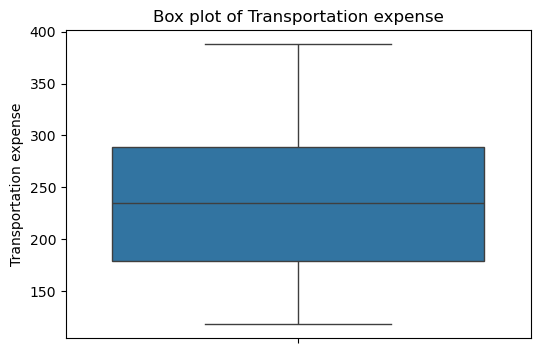

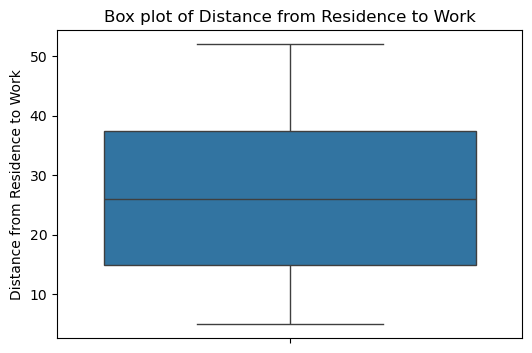

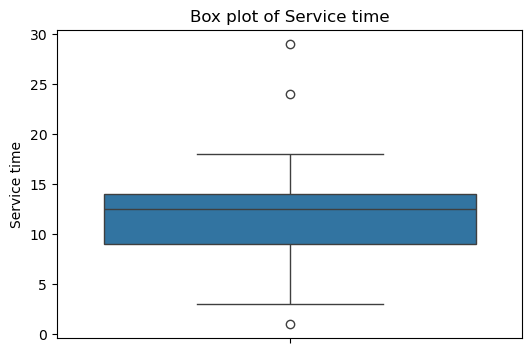

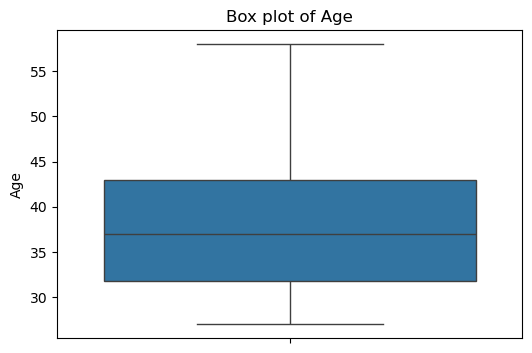

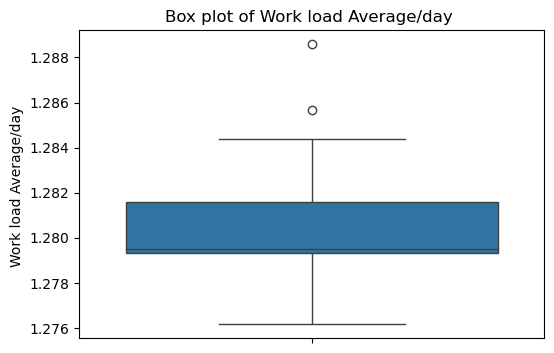

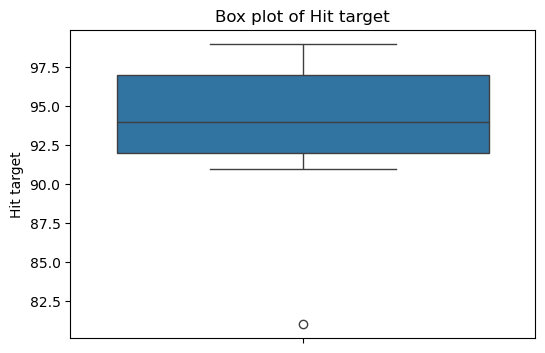

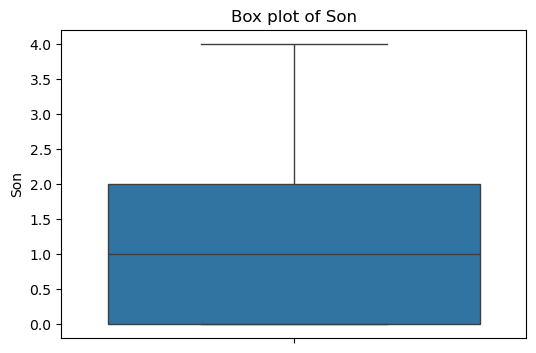

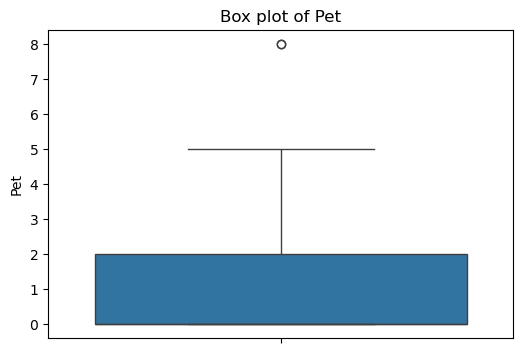

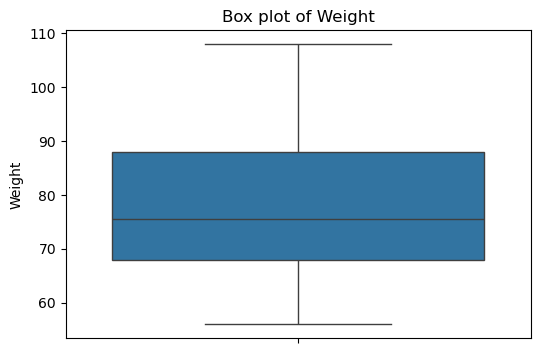

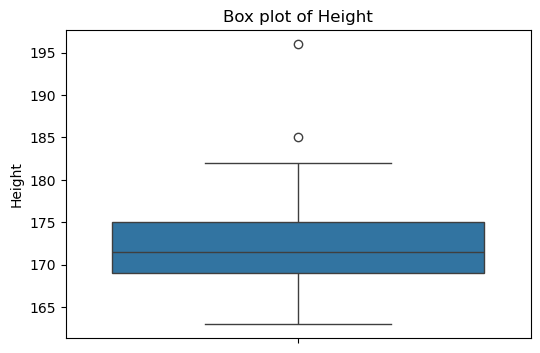

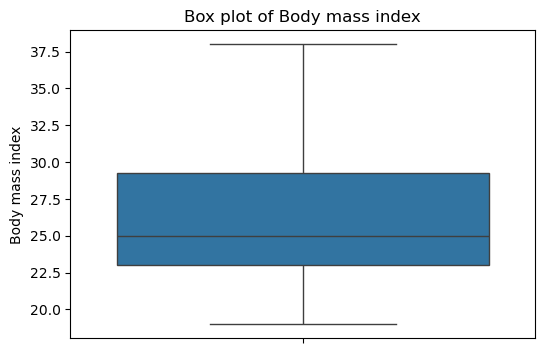

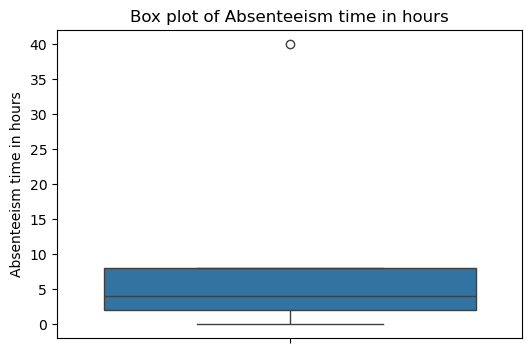

In [142]:
#checking outliers
for column in df.select_dtypes(include='number'):
    plt.figure(figsize=(6, 4))
    sns.boxplot(df[column])
    plt.title(f"Box plot of {column}")
    plt.show()

In [160]:
for column in df.select_dtypes(include='number'):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr 
    upper = q3 + 1.5 * iqr
    outliers_count = ((df[column] < lower) | (df[column] > upper)).sum()
    print(f"{column}: {outliers_count} outliers, {(outliers_count/len(df.select_dtypes(include='number')) * 100 ):.2f}%")
    

ID: 0 outliers, 0.00%
Month of absence: 4 outliers, 11.11%
Transportation expense: 0 outliers, 0.00%
Distance from Residence to Work: 0 outliers, 0.00%
Service time: 3 outliers, 8.33%
Age: 0 outliers, 0.00%
Work load Average/day : 2 outliers, 5.56%
Hit target: 1 outliers, 2.78%
Son: 0 outliers, 0.00%
Pet: 2 outliers, 5.56%
Weight: 0 outliers, 0.00%
Height: 2 outliers, 5.56%
Body mass index: 0 outliers, 0.00%
Absenteeism time in hours: 1 outliers, 2.78%


There are not much outliers and the one present does not really that much affect the data

<Axes: >

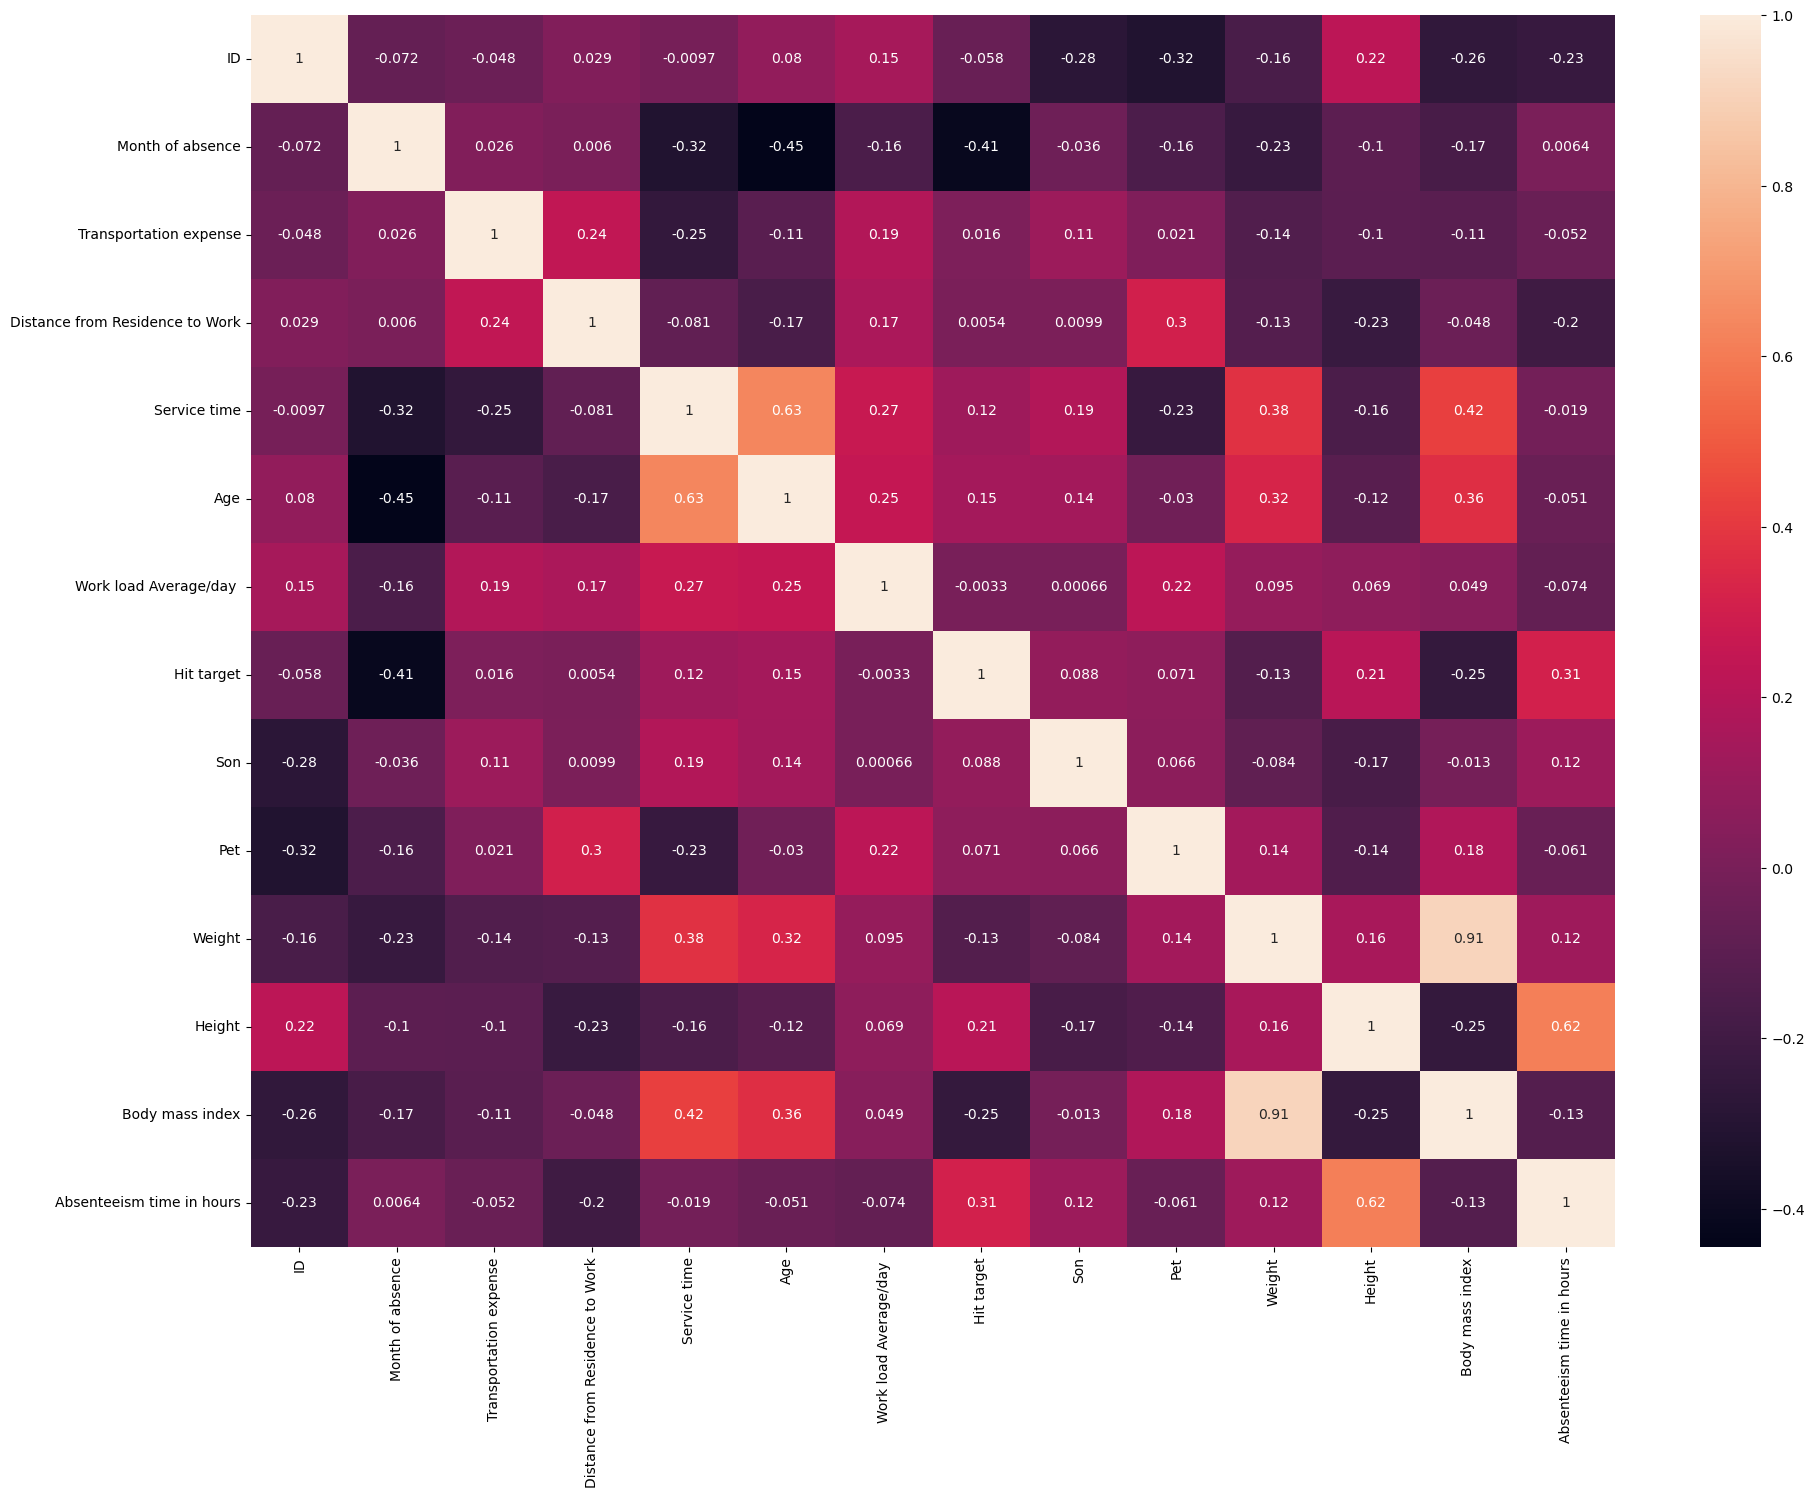

In [166]:
plt.figure(figsize=(22, 16))
sns.heatmap(data=df.select_dtypes(include='number').corr(), annot=True)

In [172]:
#dropping highly correlated attributes
corr_matrix = df.select_dtypes(include='number').corr()
threshold=0.8
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any (upper_triangle[column].abs() > threshold)]
print('Features to drop: ', to_drop)
df = df.drop(columns=to_drop)
print('Shape after dropping columns: ', df.shape)

Features to drop:  ['Body mass index']
Shape after dropping columns:  (36, 20)


shape has reduced from (720, 41) to (26, 20)

<Axes: xlabel='Absenteeism time in hours', ylabel='Count'>

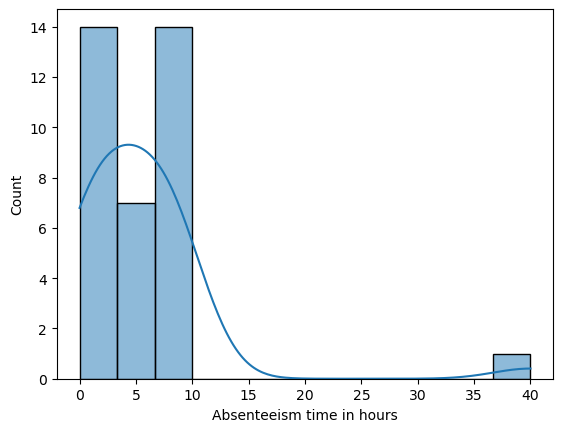

In [191]:
sns.histplot(df['Absenteeism time in hours'], kde=True)